In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_curve, auc

In [88]:
df = pd.read_csv('breast-cancer.csv')

In [89]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [90]:
df.shape

(569, 32)

In [91]:
df.drop(['id'], inplace = True, axis = 1)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

<Axes: xlabel='count', ylabel='diagnosis'>

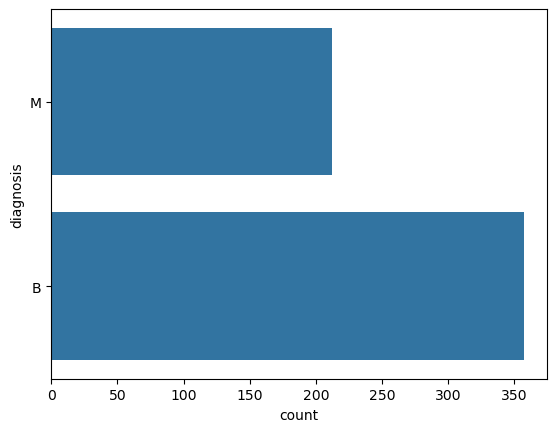

In [93]:
sns.countplot(df["diagnosis"])

In [94]:
df["diagnosis"] = [1 if i.strip() == "M" else 0 for i in df.diagnosis]

In [95]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


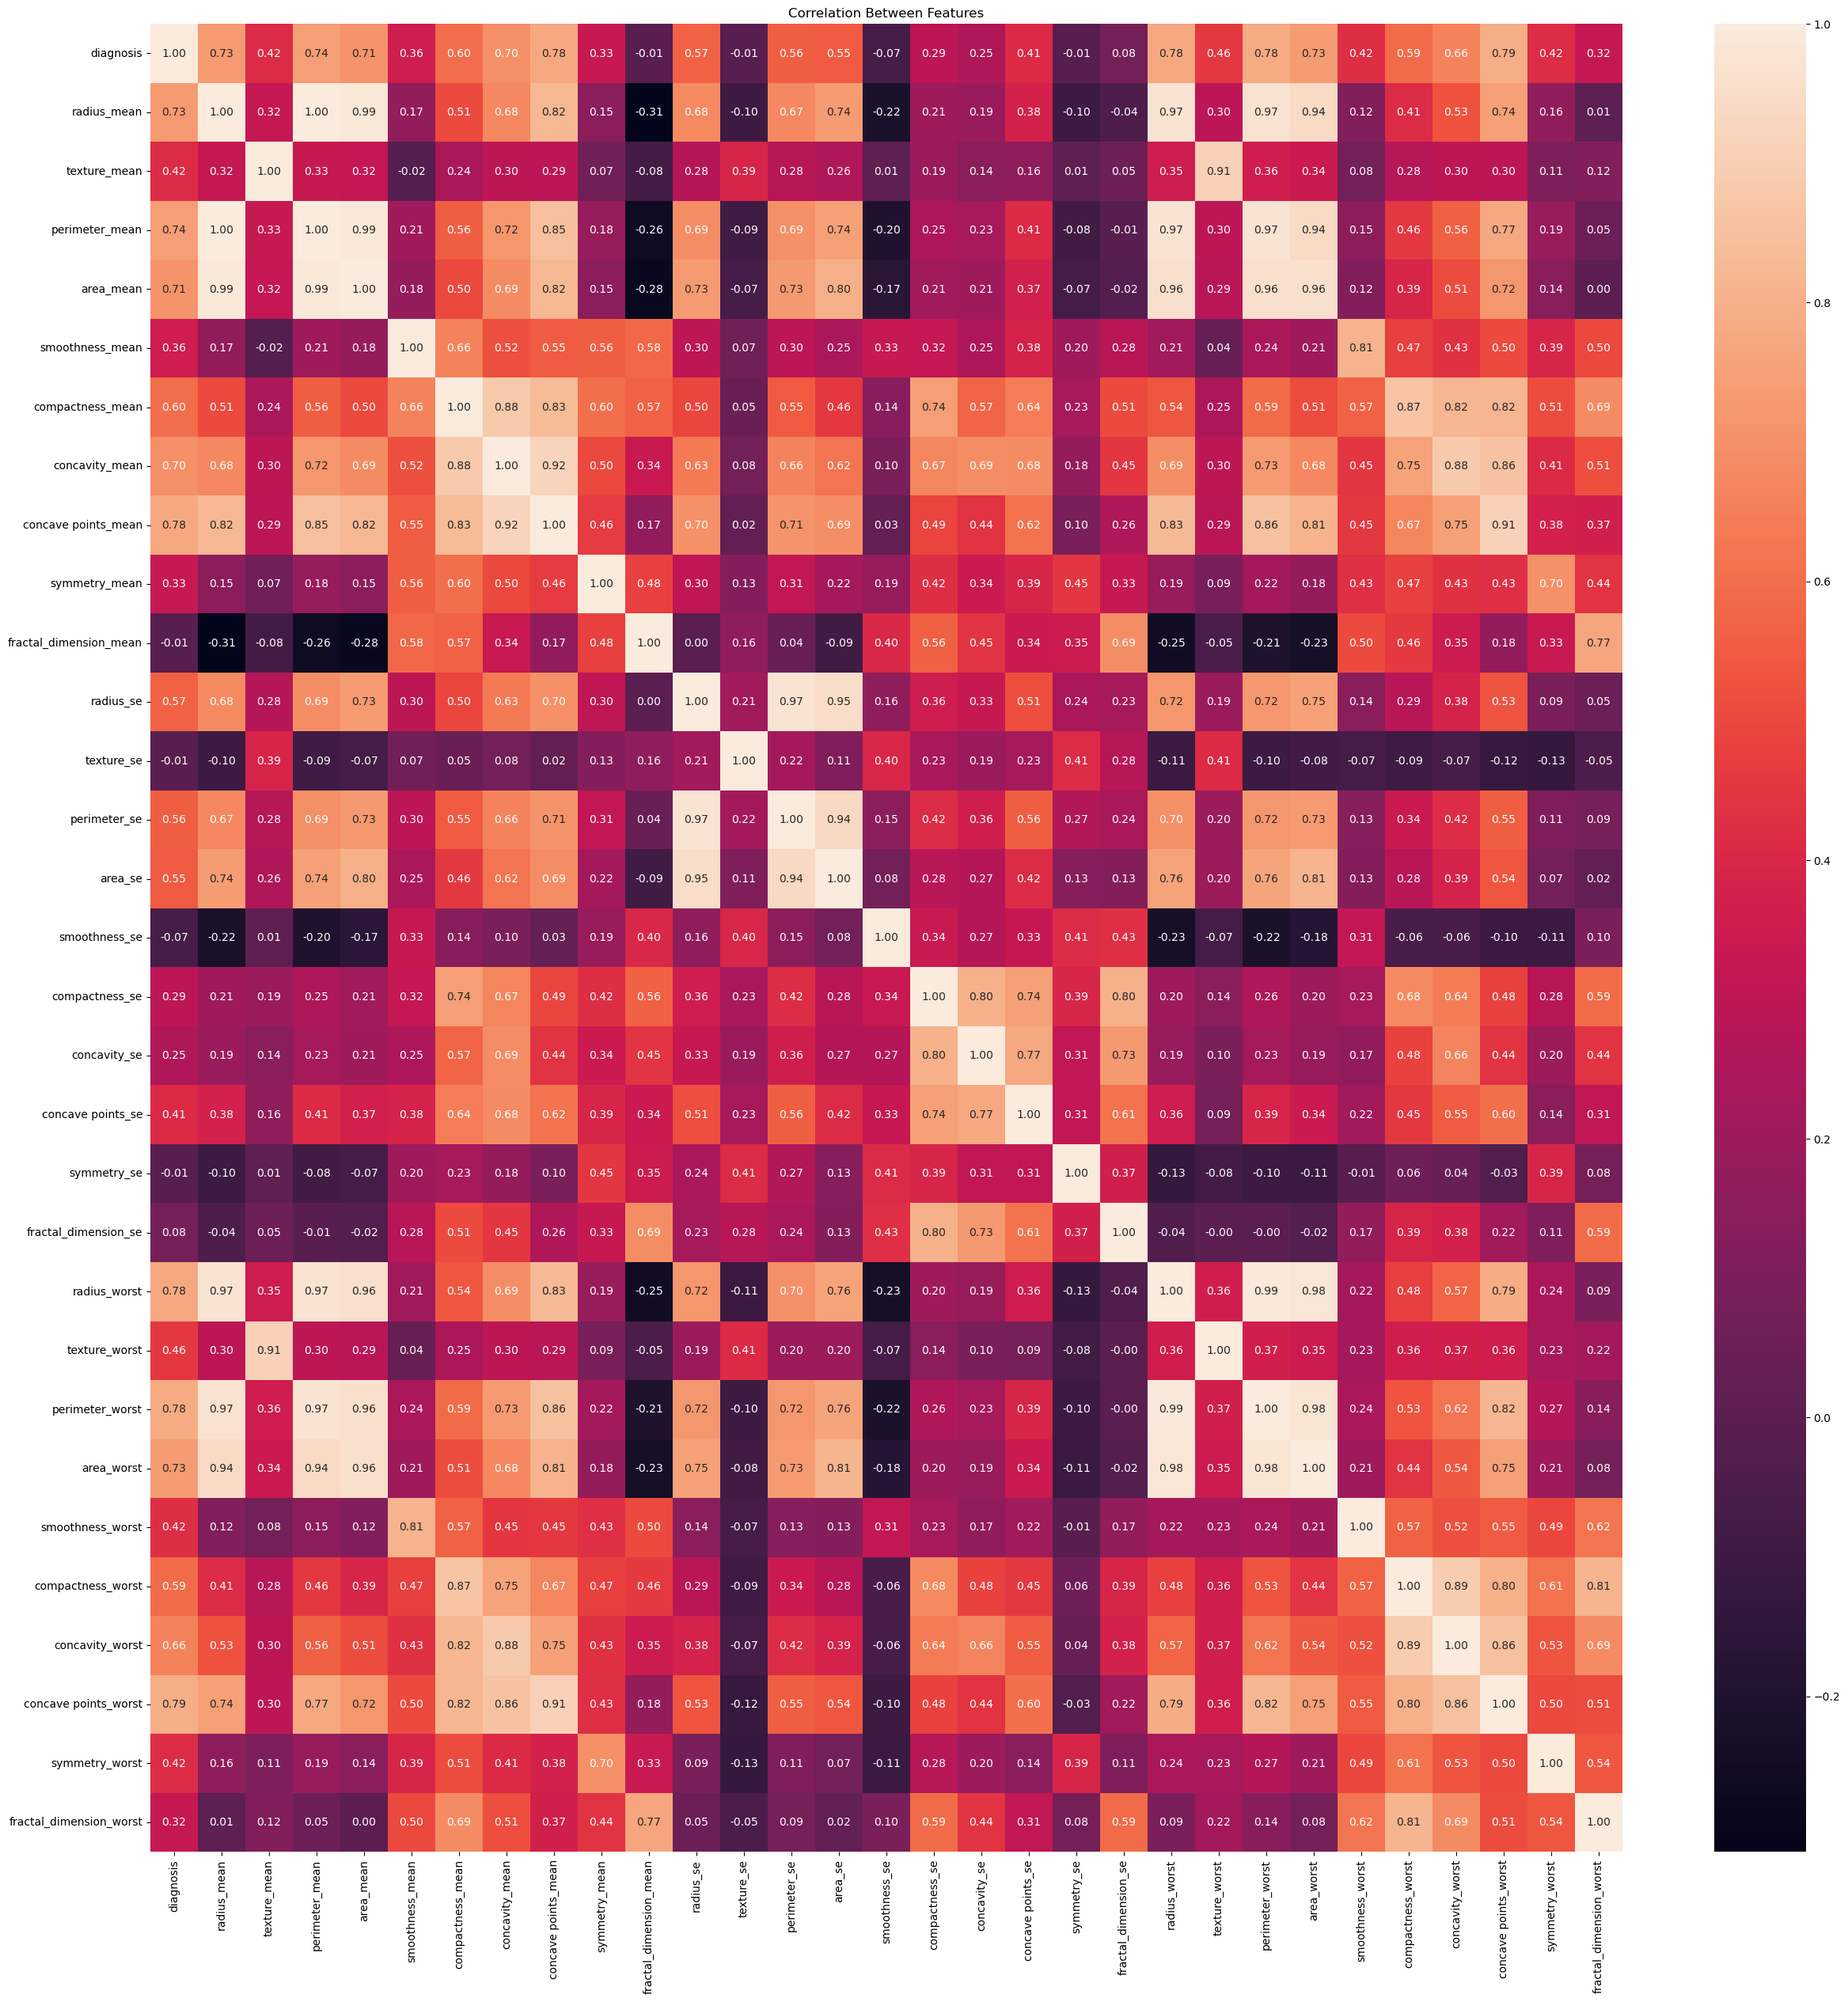

In [96]:
corr_matrix = df.corr()
plt.figure(figsize=(30,30))
sns.heatmap(corr_matrix, annot = True, fmt = ".2f")

plt.title("Correlation Between Features")
plt.show()

In [97]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [98]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [99]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)

In [100]:
model = Sequential([
    Dense(16, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

C:\Users\asus\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [101]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [102]:
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    verbose=1
)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.5900 - loss: 0.6989 - val_accuracy: 0.7250 - val_loss: 0.6086
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7088 - loss: 0.6001 - val_accuracy: 0.8125 - val_loss: 0.5285
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8025 - loss: 0.5287 - val_accuracy: 0.8250 - val_loss: 0.4690
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8294 - loss: 0.4681 - val_accuracy: 0.8375 - val_loss: 0.4215
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8844 - loss: 0.4210 - val_accuracy: 0.8500 - val_loss: 0.3844
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8917 - loss: 0.3782 - val_accuracy: 0.8750 - val_loss: 0.3531
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9037 - loss: 0.3378 - val_accuracy: 0.8875 - val_loss: 0.3247
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9095 - loss: 0.3160 - val_accuracy: 0.

In [103]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {accuracy:.4f}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9830 - loss: 0.0788

Test Accuracy: 0.9883


In [104]:
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype("int32").flatten()

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [105]:
cm = confusion_matrix(y_test, y_pred)

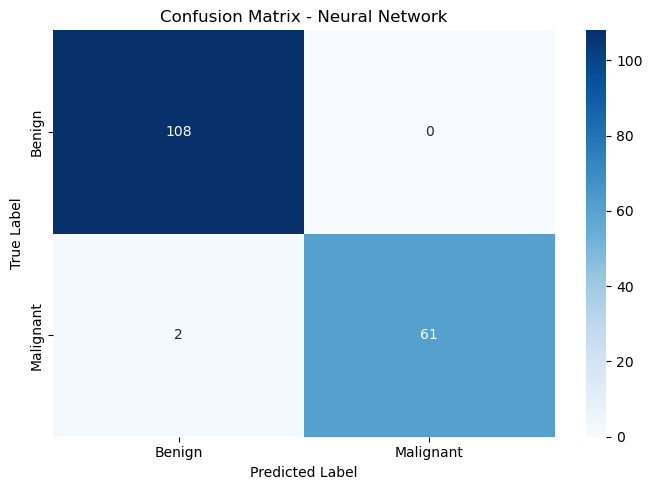

In [106]:
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Benign', 'Malignant'], 
            yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Neural Network')
plt.tight_layout()
plt.show()

In [107]:
print("\nClassification Report:\n", classification_report(
    y_test, y_pred, target_names=['Benign', 'Malignant']
))


Classification Report:
               precision    recall  f1-score   support

      Benign       0.98      1.00      0.99       108
   Malignant       1.00      0.97      0.98        63

    accuracy                           0.99       171
   macro avg       0.99      0.98      0.99       171
weighted avg       0.99      0.99      0.99       171



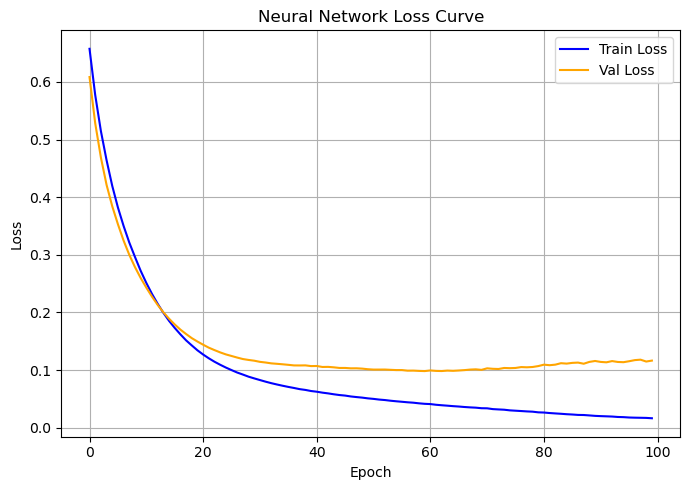

In [108]:
plt.figure(figsize=(7, 5))
plt.plot(history.history['loss'], label='Train Loss', color='blue')
plt.plot(history.history['val_loss'], label='Val Loss', color='orange')
plt.title('Neural Network Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

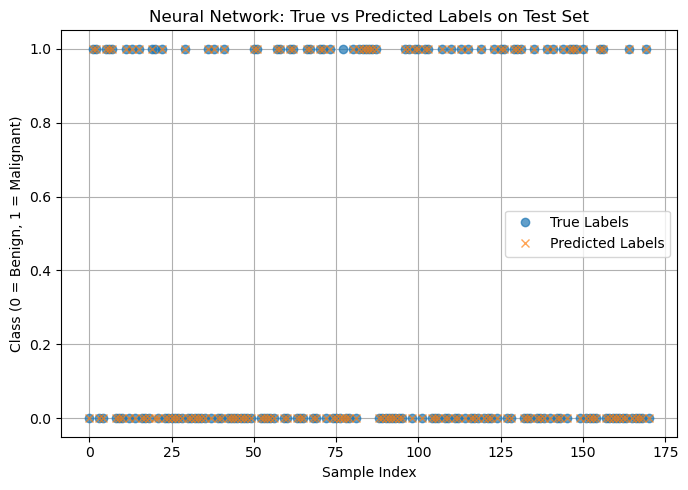

In [109]:
plt.figure(figsize=(7, 5))
plt.plot(y_test.values, label='True Labels', marker='o', linestyle='', alpha=0.7)
plt.plot(y_pred, label='Predicted Labels', marker='x', linestyle='', alpha=0.7)
plt.title("Neural Network: True vs Predicted Labels on Test Set")
plt.xlabel("Sample Index")
plt.ylabel("Class (0 = Benign, 1 = Malignant)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [110]:
kernels = ['linear', 'poly', 'rbf']
svm_models = {}
svm_results = {}


SVM linear kernel
Accuracy: 0.9766
Confusion Matrix:
 [[106   2]
 [  2  61]]
Classification Report:
               precision    recall  f1-score   support

      Benign       0.98      0.98      0.98       108
   Malignant       0.97      0.97      0.97        63

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



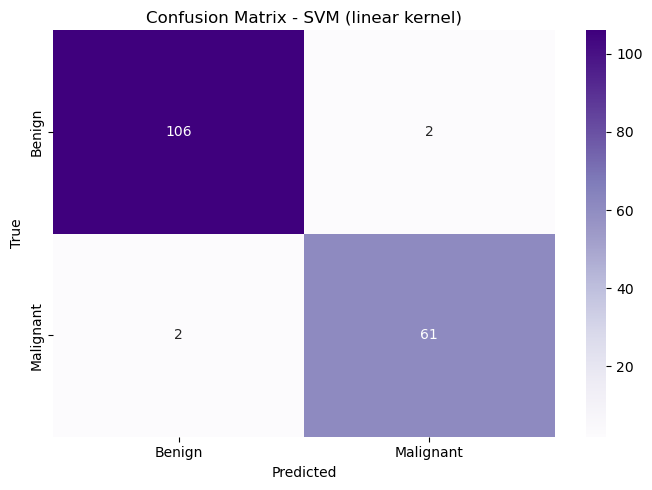


SVM poly kernel
Accuracy: 0.8947
Confusion Matrix:
 [[108   0]
 [ 18  45]]
Classification Report:
               precision    recall  f1-score   support

      Benign       0.86      1.00      0.92       108
   Malignant       1.00      0.71      0.83        63

    accuracy                           0.89       171
   macro avg       0.93      0.86      0.88       171
weighted avg       0.91      0.89      0.89       171



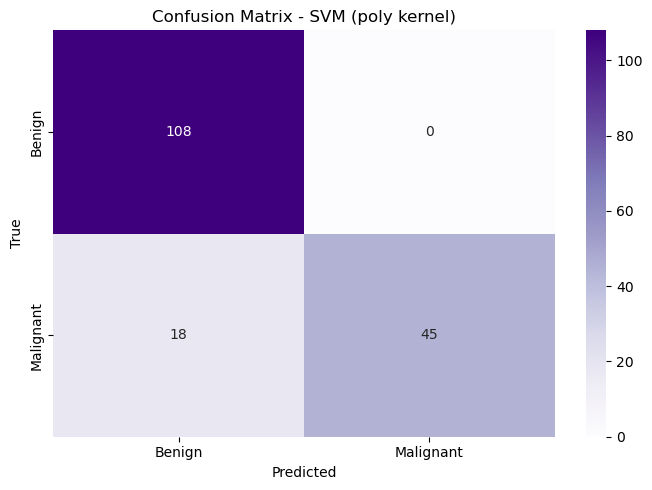


SVM rbf kernel
Accuracy: 0.9708
Confusion Matrix:
 [[105   3]
 [  2  61]]
Classification Report:
               precision    recall  f1-score   support

      Benign       0.98      0.97      0.98       108
   Malignant       0.95      0.97      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



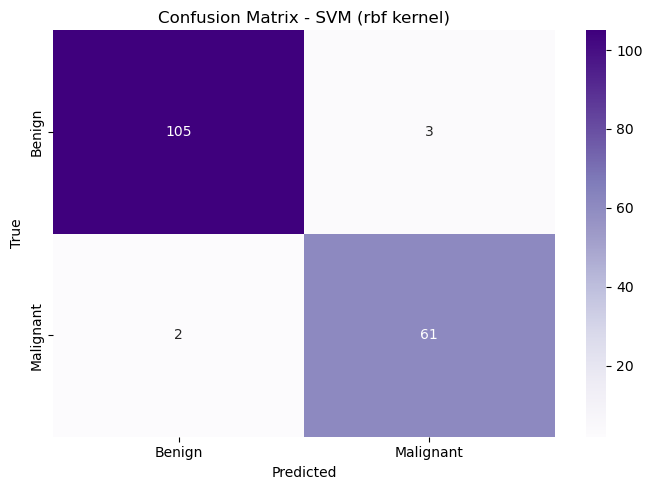

In [111]:
for kernel in kernels:
    svm = SVC(kernel=kernel, probability=True, random_state=42)
    svm.fit(X_train, y_train)
    y_pred_svm = svm.predict(X_test)
    y_prob_svm = svm.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred_svm)
    cm_svm = confusion_matrix(y_test, y_pred_svm)
    report = classification_report(y_test, y_pred_svm, target_names=['Benign', 'Malignant'])

    svm_models[kernel] = svm
    svm_results[kernel] = {
        'accuracy': acc,
        'confusion_matrix': cm_svm,
        'classification_report': report,
        'y_pred': y_pred_svm,
        'y_prob': y_prob_svm
    }

    print(f"\nSVM {kernel} kernel")
    print(f"Accuracy: {acc:.4f}")
    print("Confusion Matrix:\n", cm_svm)
    print("Classification Report:\n", report)

    plt.figure(figsize=(7, 5))
    sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Purples', 
                xticklabels=['Benign', 'Malignant'], 
                yticklabels=['Benign', 'Malignant'])
    plt.title(f'Confusion Matrix - SVM ({kernel} kernel)')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.tight_layout()
    plt.show()

In [112]:
nn_fpr, nn_tpr, _ = roc_curve(y_test, y_pred_probs)
nn_auc = auc(nn_fpr, nn_tpr)

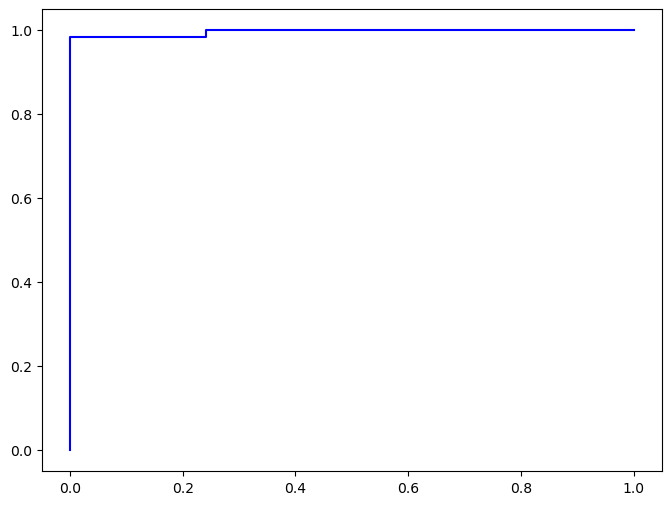

In [113]:
plt.figure(figsize=(8, 6))
plt.plot(nn_fpr, nn_tpr, label=f'Neural Network (AUC = {nn_auc:.2f})', color='blue')

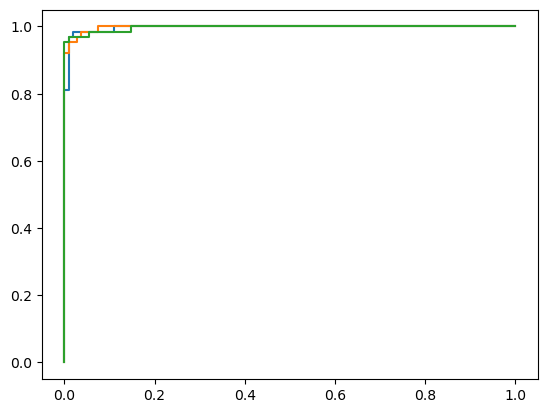

In [114]:
for kernel in kernels:
    y_prob = svm_results[kernel]['y_prob']
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'SVM ({kernel}) (AUC = {roc_auc:.2f})')

In [115]:
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

In [116]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [117]:
best_model = grid_search.best_estimator_


In [118]:
y_pred = best_model.predict(X_test)

In [119]:
print("Best Parameters:", grid_search.best_params_)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Test Accuracy: 0.9766081871345029
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       108
           1       0.97      0.97      0.97        63

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



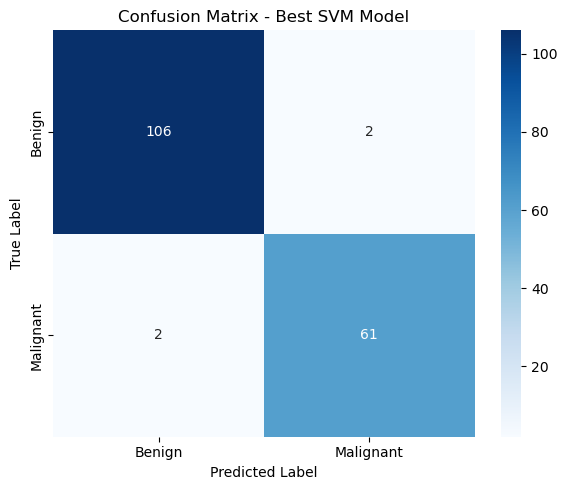

In [120]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Benign', 'Malignant'], 
            yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Best SVM Model')
plt.tight_layout()
plt.show()

In [121]:
print(f"Neural Network Accuracy: {accuracy:.4f}")
for kernel in kernels:
    print(f"SVM {kernel} Accuracy: {svm_results[kernel]['accuracy']:.4f}")

Neural Network Accuracy: 0.9883
SVM linear Accuracy: 0.9766
SVM poly Accuracy: 0.8947
SVM rbf Accuracy: 0.9708
